In [51]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

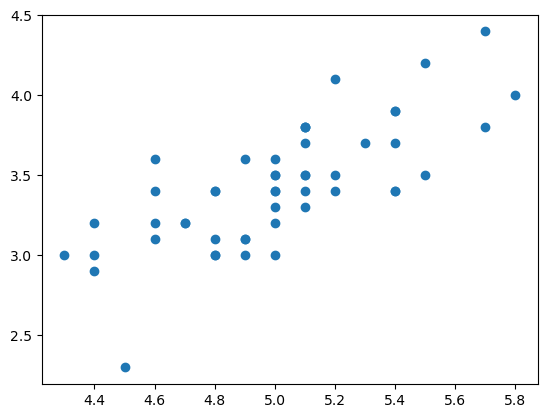

In [72]:
X = iris.data[iris.target==0, :]
plt.scatter(X[:, 0], X[:, 1])

In [63]:
partialpca = IncrementalPCA()

partialpca.transform(X_slice[[0], :])



NotFittedError: This IncrementalPCA instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

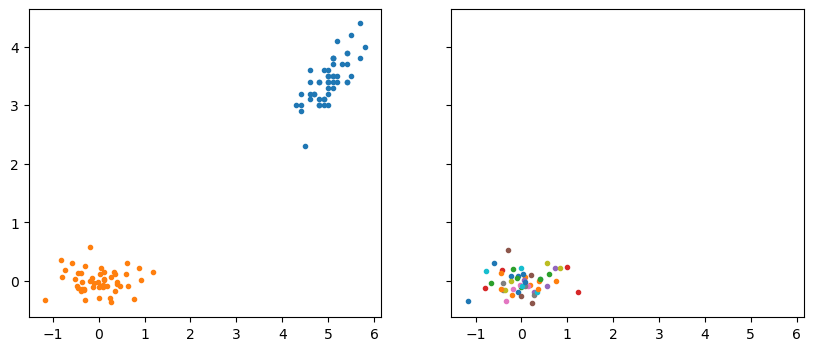

In [75]:
n_components = 2
partialpca = IncrementalPCA(n_components=n_components)
pca = PCA(n_components=n_components)

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
ax[0].scatter(X[:, 0], X[:, 1], marker='.')

Y_all = pca.fit_transform(X)
ax[0].scatter(Y_all[:, 0], Y_all[:, 1], marker='.')

Y_all2 = np.zeros((X.shape[0], n_components))
batchsize = 4
for i in range(0, 50,  batchsize):
    # print(i, i+batchsize)
    X_slice = X[i:i+batchsize, :]
    partialpca.partial_fit(X_slice)
    Y_slice = partialpca.transform(X_slice)
    Y_all2[i:i+batchsize, :] = Y_slice
    ax[1].scatter(Y_slice[:, 0], Y_slice[:, 1], marker='.')


In [77]:
partialpca.explained_variance_ratio_.sum()

0.876540279611677

In [26]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [47]:
from hipposlam.utils import read_pickle

load_hipposlam_pth = 'data\StateMapLearnerEmbedding_NoCueTypes\PPO3_hipposlam.pickle'

hipposlam = read_pickle(load_hipposlam_pth)

hipposlam.keys()

dict_keys(['hipposeq', 'hippomap', 'fpos'])

In [48]:
embeds = np.stack(hipposlam['hippomap'].sid2embed)
Jmat = hipposlam['hippomap'].J.mat

print(embeds.shape)
print(Jmat.shape)

(454, 576)
(454, 114, 24)


In [49]:
pca = PCA()
partialpca = IncrementalPCA()
pca.fit(embeds)
partialpca.fit(embeds)

IncrementalPCA()

<BarContainer object of 454 artists>

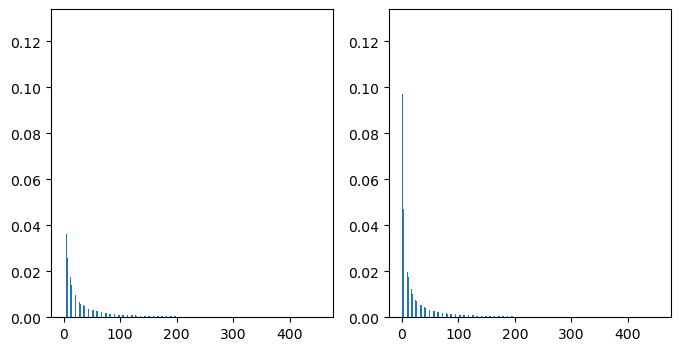

In [50]:
varratios = pca.explained_variance_ratio_
partialvarratios = partialpca.explained_variance_ratio_
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].bar(np.arange(varratios.shape[0]), varratios, width=0.4)
ax[1].bar(np.arange(partialvarratios.shape[0]), partialvarratios, width=0.4)